<a href="https://colab.research.google.com/github/eshippole/pose-estimation/blob/main/Human_Pose_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from scipy.io import loadmat
import numpy as np
import pandas as pd
from PIL import Image, ImageShow



In [ ]:
!wget http://ufldl.stanford.edu/housenumbers/train_32x32.mat
!wget http://ufldl.stanford.edu/housenumbers/test_32x32.mat
train = loadmat('train_32x32.mat')
test = loadmat('test_32x32.mat')


--2021-01-08 03:49:19--  http://ufldl.stanford.edu/housenumbers/train_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182040794 (174M) [text/plain]
Saving to: ‘train_32x32.mat.2’

train_32x32.mat.2   100%[===================>] 173.61M  18.5MB/s    in 13s     

2021-01-08 03:49:32 (13.6 MB/s) - ‘train_32x32.mat.2’ saved [182040794/182040794]

--2021-01-08 03:49:32--  http://ufldl.stanford.edu/housenumbers/test_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64275384 (61M) [text/plain]
Saving to: ‘test_32x32.mat.2’

test_32x32.mat.2    100%[===================>]  61.30M  17.0MB/s    in 6.6s    

2021-01-08 03:49:39 (9.23 MB/s) - ‘test_32x32.mat.2’ saved [642

In [ ]:
X_train, y_train = train['X'], train['y']
X_test, y_test = test['X'], test['y']

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(32, 32, 3, 73257)
(73257, 1)
(32, 32, 3, 26032)
(26032, 1)


In [ ]:
numberTraining = X_train.shape[3] + X_test.shape[3]
print("Total examples:", numberTraining)

Total examples: 99289


(32, 32, 3, 73257)
(32, 32, 3)


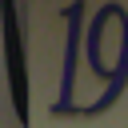

In [ ]:
img = np.array((X_train))
print(img.shape)
print(img[:,:,:,0].shape)
house_number = Image.fromarray(img[:,:,:,0])
out = house_number.resize((128, 128)) 
display(out)

In [ ]:
y_train[y_train == 10] = 0
print(np.unique(y_train))


[0 1 2 3 4 5 6 7 8 9]


In [ ]:
# This code downloads the coco dataset from Amazon S3 in parallel.
!pip install boto3
import boto3
from botocore import UNSIGNED
from botocore.client import Config
import multiprocessing
import subprocess
files = ['val2017.zip', 'annotations_trainval2017.zip', 'train2017.zip']

s3 = boto3.client('s3', config=Config(signature_version=UNSIGNED))
def download_and_unzip_from_s3(file_name, bucket_name='fast-ai-coco'):
    print("Downloading", file_name)
    s3.download_file(bucket_name, file_name, file_name)
    print("Finished downloading", file_name, ". Starting to unzip.")
    subprocess.run(["unzip", file_name])
    print("Finished unzipping", file_name)

# Download in parallel
num_cpus = multiprocessing.cpu_count()
with multiprocessing.Pool(num_cpus) as p:
    p.map(download_and_unzip_from_s3, files)

print("Done transferring all datasets")

     |████████████████████████████████| 133kB 13.6MB/s 
     |████████████████████████████████| 71kB 5.7MB/s 
     |████████████████████████████████| 7.2MB 16.9MB/s 
     |████████████████████████████████| 143kB 54.9MB/s 
ERROR: requests 2.23.0 has requirement urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you'll have urllib3 1.26.2 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


Finished downloading annotations_trainval2017.zip . Starting to unzip.
Finished downloading val2017.zip . Starting to unzip.
Finished unzipping annotations_trainval2017.zip
Finished unzipping val2017.zip
Finished downloading train2017.zip . Starting to unzip.
Finished unzipping train2017.zip
Done transferring all datasets
